In [88]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re
import ast
import importlib

Seems that we have different days for the same subject, maybe we can look to see if across days do neurons spiking patterns change in all subjects? Does it change for subjects that win more?

In [89]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [90]:
df_path = r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\outputs\zscores_global_baseline_standardway.csv"

In [91]:
# 1) Read
units_df = pd.read_csv(df_path)
units_df.head(30)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.093333,0.095243,0.075,-0.192490,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.436667,0.201956,0.270,-0.825261,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.053333,0.069512,0.185,1.894159,increase,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.708333,0.317644,0.690,-0.057717,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,3.223333,0.939728,3.215,-0.008868,not sig,40
5,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,130,0.060000,0.079600,0.105,0.565326,not sig,40
6,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,143,1.016667,0.312238,0.970,-0.149458,not sig,40
7,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,147,0.068333,0.063133,0.060,-0.131997,not sig,40
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,0.183333,0.185976,0.570,2.079127,increase,40
9,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,189,1.528333,0.395527,1.815,0.724771,not sig,40


In [92]:
units_df = units_df[units_df['sig'] != 'not sig']
units_df = units_df.drop(["Global Pre-event M", "Global Pre-event SD", "Event M"], axis=1)

In [93]:
df = units_df.copy()
event_df = df[df['Event name'] == 'high_comp_win']

significant_units = event_df['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")

Number of significant units for high_comp_win: 111


In [94]:
units_df.columns

Index(['Recording', 'Event name', 'Unit number', 'Event Z-Score', 'sig',
       'Event windows'],
      dtype='object')

In [95]:
units_df.head(10)

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,1.894159,increase,40
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,2.079127,increase,40
12,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,211,-2.638851,decrease,40
15,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,232,4.595309,increase,40
16,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,33,-1.675371,decrease,40
38,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded_baseline,33,-1.792941,decrease,40
40,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded_baseline,65,-1.689548,decrease,40
45,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,11,2.019139,increase,9
48,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,126,-2.188577,decrease,9
50,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,143,3.647497,increase,9


### Integrate Putative Types | get csv with putative types and dataframe here and combine them

Using functions from venn_upset_plot_creation.py that allow us to create venn and upset plots as well as find overlapping sig neurons per event

In [96]:
# using os to use functions from this py file C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\venn_upset_plot_creation.py
import os
import sys
module_path = r"C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp"
sys.path.append(module_path)

from venn_upset_plot_creation import create_venn_diagram, analyze_event_overlap, create_overlap_visualization

In [97]:
# use importlib to reload venn_upset_plot_creation if we make changes to it
import importlib
importlib.reload(sys.modules['venn_upset_plot_creation'])

<module 'venn_upset_plot_creation' from 'C:\\Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp\\venn_upset_plot_creation.py'>

EXAMPLE 1: Alone Rewarded vs Win vs Lose Events
Significant units for increase: [11, 143, 147, 23, 232, 33, 65, 12, 52, 68, 83, 14, 162, 210, 273, 479, 481, 10, 107, 174, 181, 205, 207, 28, 32, 34, 118, 6, 74, 80, 119, 13, 23, 34, 373, 90, 100, 102, 104, 108, 109, 23, 30, 53, 64, 59, 35, 48, 72, 103, 118, 19, 87, 134, 187, 263, 274, 207, 266, 7, 82, 84, 87, 130, 192, 164, 171, 90, 101, 113, 158, 248, 106, 98, 150, 190, 20, 109, 124, 146, 46, 60, 67, 110, 31, 59, 66, 93, 98, 101, 103, 15, 89, 14, 101, 13, 169, 177, 183, 216, 28, 24, 32, 4, 32, 12, 24, 42, 49, 54, 81]
win: 111 significant units
Significant units for increase: [104, 33, 51, 65, 12, 52, 61, 34, 40, 6, 83, 90, 1, 126, 14, 162, 176, 2, 210, 211, 240, 273, 283, 400, 403, 21, 223, 479, 481, 489, 513, 54, 60, 107, 174, 181, 20, 22, 34, 4, 0, 192, 229, 248, 295, 5, 6, 74, 80, 12, 13, 174, 175, 21, 23, 298, 331, 34, 369, 373, 376, 88, 120, 122, 133, 180, 43, 46, 104, 108, 109, 23, 30, 80, 28, 48, 54, 74, 139, 76, 90, 19, 187, 263

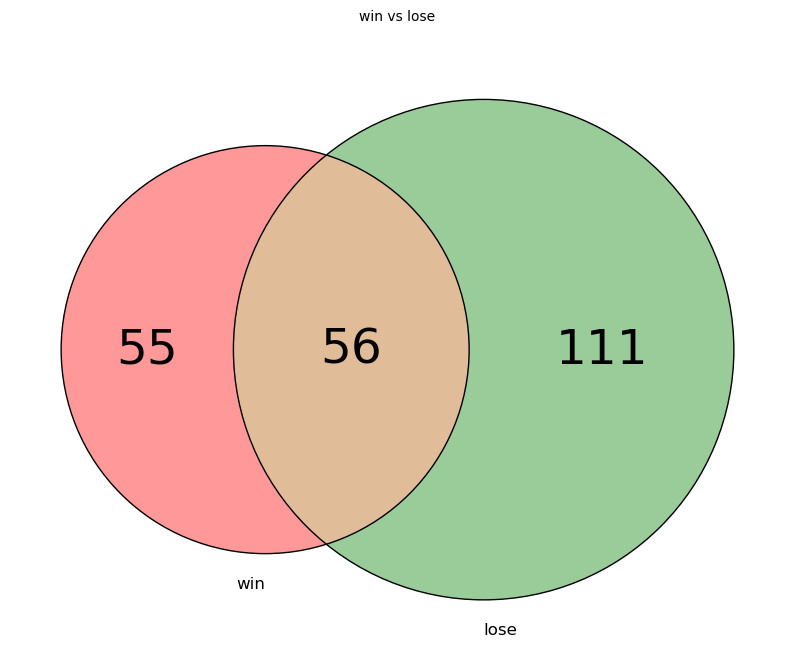

In [98]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
print("EXAMPLE 1: Alone Rewarded vs Win vs Lose Events")
events_to_compare = ['win', 'lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='increase', 
                        title="All Significant Units");

EXAMPLE 1: Alone Rewarded vs Win vs Lose Events
Significant units for decrease: [199, 15, 46, 11, 38, 40, 6, 90, 93, 403, 70, 74, 300, 12, 144, 195, 22, 23, 26, 33, 53, 12, 12, 18, 235, 13, 151, 18, 9, 111, 116, 7, 17, 34, 39, 46, 49, 9, 99, 132, 262, 268, 89, 124, 45, 26, 36, 74, 181, 14, 170, 46, 33, 59, 154, 9, 111, 63, 3, 74, 32, 8, 58, 73, 12, 25, 62, 80, 81, 88, 3, 53]
win: 72 significant units
Significant units for decrease: [126, 143, 189, 199, 211, 232, 50, 58, 11, 38, 93, 36, 70, 300, 12, 144, 195, 23, 32, 33, 53, 12, 154, 18, 76, 9, 111, 7, 3, 132, 6, 145, 33, 79, 210, 13, 39, 50, 54, 66, 68, 73, 9, 33, 74, 32, 210, 23, 27, 58, 73, 77, 62, 8, 88, 27, 0, 18]
lose: 58 significant units
Significant units for overlap: {'20230612_subj_1-1_t1b3L_box2_Unit93', '20230613_subj_1-4_t4b3L_box2_Unit195', '20230612_subj_1-2_t2b2L_box1_Unit70', '20240322_subj_4-3_t6b6_Unit58', '20230619_subj_1-4_t3b3L_box2_Unit132', '20230616_subj_1-4_t4b3L_box1_Unit7', '20240323_subj_3-1_t5b5_Unit88', '2

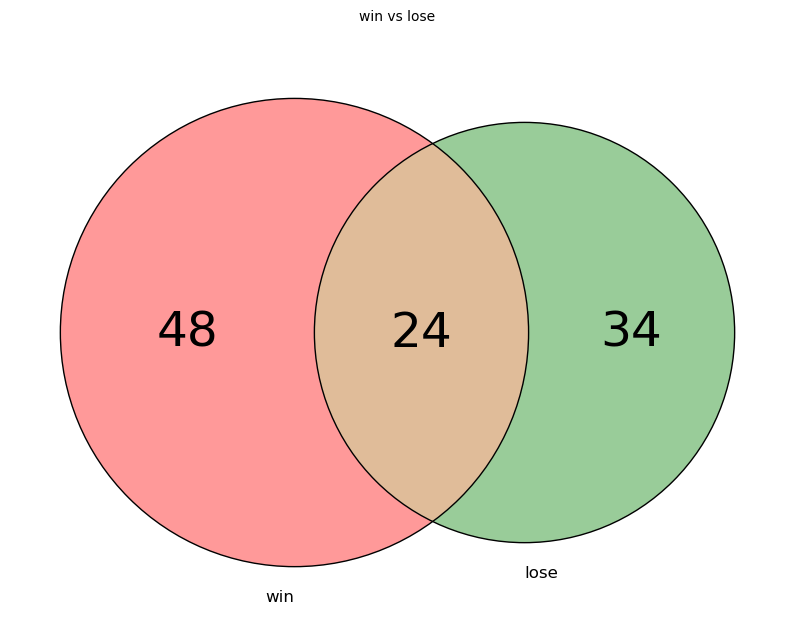

In [99]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
print("EXAMPLE 1: Alone Rewarded vs Win vs Lose Events")
events_to_compare = ['win', 'lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='decrease', 
                        title="All Significant Units");

EXAMPLE 1: Alone Rewarded vs Win vs Lose Events
Significant units for increase: [122, 158, 232, 12, 47, 50, 52, 68, 300, 481, 513, 10, 107, 181, 190, 32, 34, 4, 44, 6, 9, 12, 33, 13, 9, 104, 108, 23, 64, 80, 3, 61, 183, 25, 62]
alone_rewarded: 35 significant units
Significant units for increase: [11, 143, 147, 23, 232, 33, 65, 12, 52, 68, 83, 14, 162, 210, 273, 479, 481, 10, 107, 174, 181, 205, 207, 28, 32, 34, 118, 6, 74, 80, 119, 13, 23, 34, 373, 90, 100, 102, 104, 108, 109, 23, 30, 53, 64, 59, 35, 48, 72, 103, 118, 19, 87, 134, 187, 263, 274, 207, 266, 7, 82, 84, 87, 130, 192, 164, 171, 90, 101, 113, 158, 248, 106, 98, 150, 190, 20, 109, 124, 146, 46, 60, 67, 110, 31, 59, 66, 93, 98, 101, 103, 15, 89, 14, 101, 13, 169, 177, 183, 216, 28, 24, 32, 4, 32, 12, 24, 42, 49, 54, 81]
win: 111 significant units
Significant units for increase: [104, 33, 51, 65, 12, 52, 61, 34, 40, 6, 83, 90, 1, 126, 14, 162, 176, 2, 210, 211, 240, 273, 283, 400, 403, 21, 223, 479, 481, 489, 513, 54, 60, 107, 

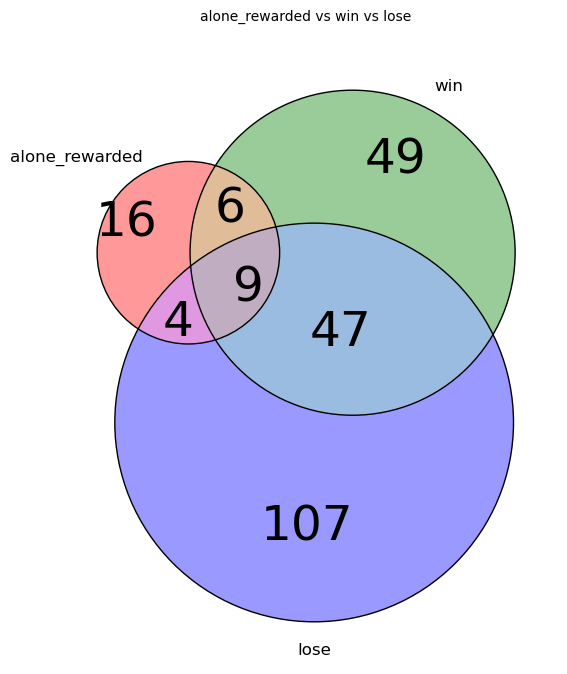

In [100]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
print("EXAMPLE 1: Alone Rewarded vs Win vs Lose Events")
events_to_compare = ['alone_rewarded', 'win', 'lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='increase', 
                        title="All Significant Units");

Significant units for decrease: [211, 33, 15, 34, 38, 40, 6, 8, 83, 90, 1, 14, 162, 210, 403, 54, 60, 12, 195, 197, 22, 33, 0, 248, 6, 13, 331, 34, 373, 376, 111, 7, 20, 124, 110, 13, 19, 101, 18, 89, 14, 8, 101, 13, 169, 216, 27, 73, 25, 4, 32, 4, 18, 42]
alone_rewarded: 54 significant units
Significant units for decrease: [199, 15, 46, 11, 38, 40, 6, 90, 93, 403, 70, 74, 300, 12, 144, 195, 22, 23, 26, 33, 53, 12, 12, 18, 235, 13, 151, 18, 9, 111, 116, 7, 17, 34, 39, 46, 49, 9, 99, 132, 262, 268, 89, 124, 45, 26, 36, 74, 181, 14, 170, 46, 33, 59, 154, 9, 111, 63, 3, 74, 32, 8, 58, 73, 12, 25, 62, 80, 81, 88, 3, 53]
win: 72 significant units
Significant units for decrease: [126, 143, 189, 199, 211, 232, 50, 58, 11, 38, 93, 36, 70, 300, 12, 144, 195, 23, 32, 33, 53, 12, 154, 18, 76, 9, 111, 7, 3, 132, 6, 145, 33, 79, 210, 13, 39, 50, 54, 66, 68, 73, 9, 33, 74, 32, 210, 23, 27, 58, 73, 77, 62, 8, 88, 27, 0, 18]
lose: 58 significant units

Three-way overlap: 7 units
Three-way overlap unit

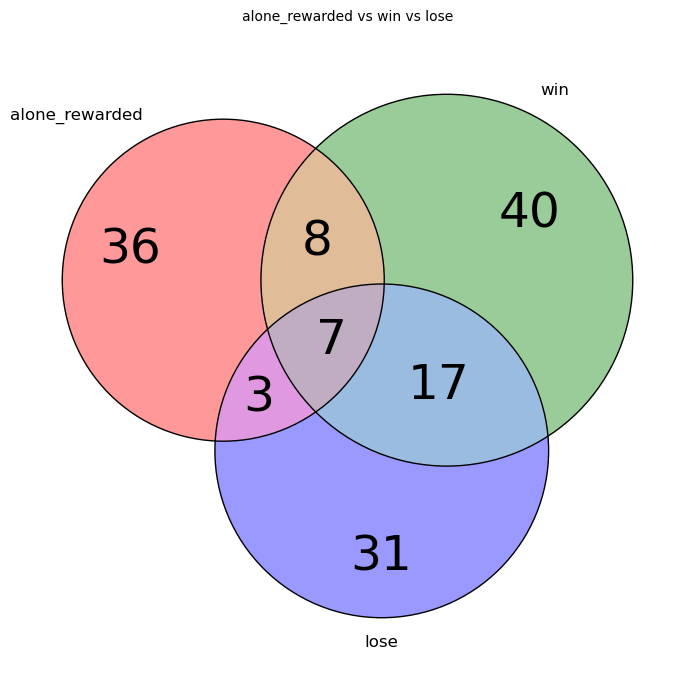

In [101]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
events_to_compare = ['alone_rewarded', 'win', 'lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='decrease',
                        title="All Significant Units");

Significant units for decrease: [211, 33, 15, 34, 38, 40, 6, 8, 83, 90, 1, 14, 162, 210, 403, 54, 60, 12, 195, 197, 22, 33, 0, 248, 6, 13, 331, 34, 373, 376, 111, 7, 20, 124, 110, 13, 19, 101, 18, 89, 14, 8, 101, 13, 169, 216, 27, 73, 25, 4, 32, 4, 18, 42]
alone_rewarded: 54 significant units
Significant units for decrease: [126, 199, 15, 11, 38, 40, 6, 93, 36, 403, 70, 74, 300, 12, 18, 235, 13, 151, 67, 9, 111, 7, 17, 34, 39, 43, 46, 49, 86, 99, 89, 124, 45, 181, 14, 170, 46, 33, 38, 46, 59, 73, 154, 9, 111, 63, 62, 3, 74, 32, 8, 58, 73, 12, 62, 8, 80, 81, 88, 3, 18, 4, 53]
high_comp_win: 63 significant units
Significant units for decrease: [11, 126, 143, 192, 232, 15, 50, 51, 58, 11, 93, 36, 70, 12, 144, 195, 197, 23, 32, 33, 53, 12, 154, 13, 67, 76, 89, 9, 111, 7, 3, 39, 59, 80, 9, 132, 262, 36, 145, 33, 79, 210, 13, 39, 50, 54, 66, 68, 73, 154, 33, 74, 32, 210, 23, 27, 58, 73, 77, 62, 8, 88, 27, 0, 4, 68]
high_comp_lose: 66 significant units

Three-way overlap: 4 units
Three-way ov

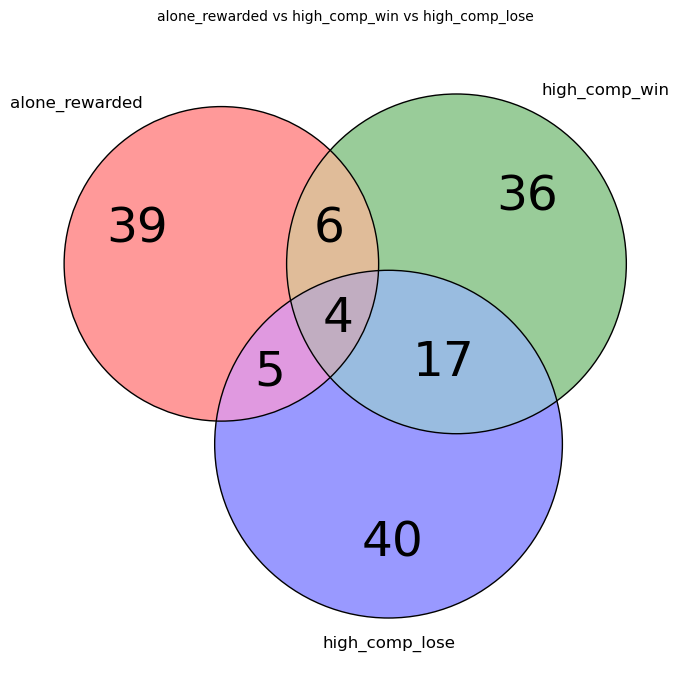

In [102]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
events_to_compare = ['alone_rewarded', 'high_comp_win', 'high_comp_lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='decrease', 
                        title="All Significant Units");

In [103]:
hc_df = units_df[units_df['Event name'] == 'high_comp_win'].copy()
hc_df.head()
print(len(hc_df))

169


### Problem, even though it says both for sig type it only have increase

In [104]:
hc_df_increasing = hc_df[hc_df['sig'] == 'increase']
hc_df_decreasing = hc_df[hc_df['sig'] == 'decrease']

print(f"Number of increasing units for high_comp_win: {len(hc_df_increasing)}")
print(f"Number of decreasing units for high_comp_win: {len(hc_df_decreasing)}")

Number of increasing units for high_comp_win: 106
Number of decreasing units for high_comp_win: 63


In [105]:
significant_units = hc_df[hc_df['sig'].isin(['increase', 'decrease'])]['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")


Number of significant units for high_comp_win: 111


Significant units for increase: [143, 147, 192, 23, 232, 33, 65, 12, 52, 68, 83, 162, 210, 273, 351, 479, 481, 513, 10, 107, 174, 181, 205, 207, 28, 32, 34, 118, 176, 13, 373, 100, 102, 104, 108, 109, 23, 30, 53, 64, 59, 16, 35, 42, 70, 72, 103, 118, 123, 134, 187, 263, 274, 7, 82, 84, 87, 28, 60, 145, 27, 79, 96, 158, 248, 106, 98, 123, 190, 109, 124, 136, 146, 46, 60, 67, 93, 98, 16, 68, 74, 78, 44, 49, 101, 169, 177, 183, 27, 28, 32, 37, 4, 24, 32, 12, 24, 42, 49, 54, 81]
Significant units for decrease: [199, 15, 46, 11, 34, 38, 40, 6, 8, 90, 93, 176, 211, 403, 70, 74, 12, 144, 195, 22, 23, 26, 33, 53, 12, 76, 12, 14, 174, 175, 18, 21, 22, 251, 331, 376, 383, 88, 13, 151, 18, 9, 111, 116, 7, 110, 25, 46, 47, 49, 52, 90, 105, 83, 9, 99, 132, 262, 268, 89, 98, 26, 36, 74, 92, 11, 125, 20, 33, 42, 46, 64, 32, 33, 48, 21, 286, 59, 66, 38, 154, 45, 111, 13, 150, 82, 32, 216, 58, 73, 77, 12, 24, 25, 62, 80, 81, 88, 1, 27, 53]
All significant units: [143, 147, 192, 199, 23, 232, 33, 65, 12

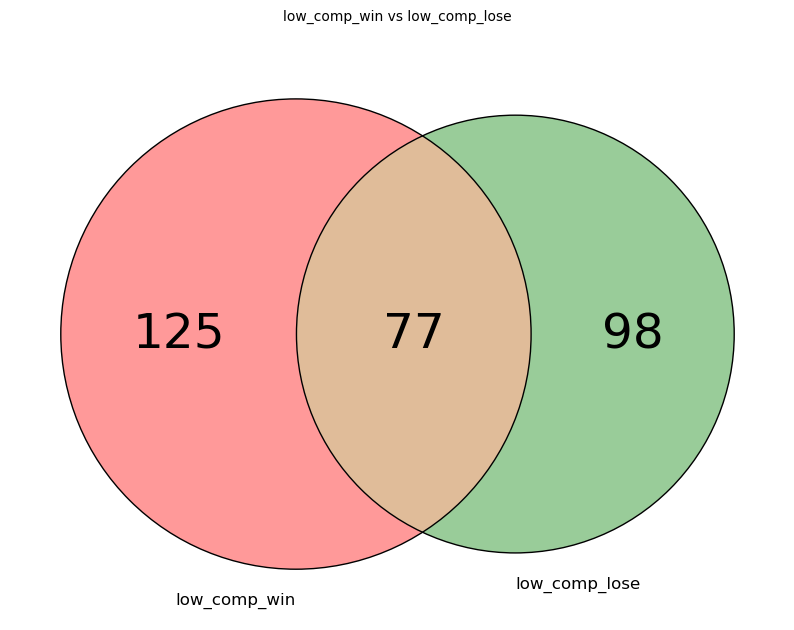

In [106]:
_ = create_venn_diagram(units_df, ['low_comp_win', 'low_comp_lose'], significance_type='both');


EXAMPLE 2: High Competition Win vs Lose
Significant units for increase: [11, 143, 23, 232, 33, 12, 50, 52, 61, 68, 34, 54, 83, 86, 14, 162, 2, 210, 273, 382, 481, 489, 118, 35, 6, 74, 80, 119, 13, 174, 23, 331, 34, 373, 106, 89, 90, 100, 104, 108, 23, 53, 64, 90, 59, 35, 48, 52, 90, 118, 19, 87, 207, 266, 130, 192, 164, 171, 90, 101, 48, 113, 158, 166, 248, 66, 98, 106, 98, 150, 190, 20, 109, 124, 60, 110, 19, 31, 59, 66, 93, 98, 101, 103, 15, 89, 14, 101, 13, 169, 177, 183, 216, 28, 24, 32, 4, 49, 32, 12, 24, 25, 42, 49, 54, 81]
Significant units for decrease: [126, 199, 15, 11, 38, 40, 6, 93, 36, 403, 70, 74, 300, 12, 18, 235, 13, 151, 67, 9, 111, 7, 17, 34, 39, 43, 46, 49, 86, 99, 89, 124, 45, 181, 14, 170, 46, 33, 38, 46, 59, 73, 154, 9, 111, 63, 62, 3, 74, 32, 8, 58, 73, 12, 62, 8, 80, 81, 88, 3, 18, 4, 53]
All significant units: [11, 126, 143, 199, 23, 232, 33, 12, 15, 50, 52, 61, 68, 11, 34, 38, 40, 54, 6, 83, 86, 93, 14, 162, 2, 210, 273, 36, 403, 70, 74, 300, 382, 481, 489, 1

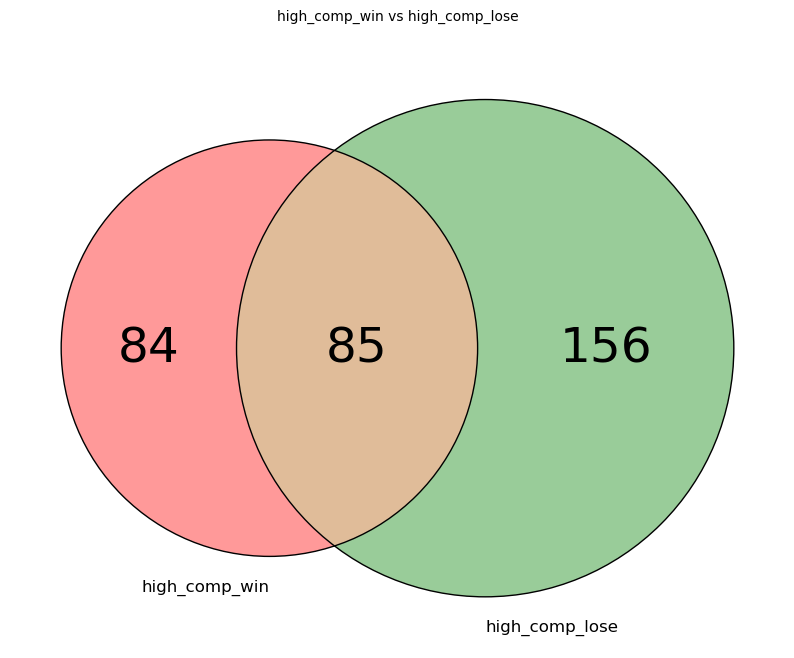

In [107]:
# Example 2: Compare high competition win vs lose (2-way comparison)
print("\nEXAMPLE 2: High Competition Win vs Lose")
high_comp_events = ['high_comp_win', 'high_comp_lose']
_ = create_venn_diagram(units_df, high_comp_events, significance_type='both');


EXAMPLE 3: High vs Low Competition - Increasing Units Only
Significant units for increase: [11, 143, 23, 232, 33, 12, 46, 52, 61, 68, 34, 40, 6, 83, 90, 1, 14, 162, 176, 2, 210, 211, 273, 382, 481, 489, 10, 107, 174, 181, 190, 20, 207, 34, 4, 44, 0, 118, 295, 6, 74, 80, 13, 174, 23, 331, 34, 369, 373, 376, 88, 180, 90, 104, 108, 109, 23, 30, 64, 80, 59, 35, 90, 103, 19, 87, 187, 263, 272, 274, 275, 17, 7, 82, 84, 87, 192, 90, 101, 23, 6, 69, 75, 48, 113, 166, 248, 98, 106, 150, 190, 20, 109, 124, 136, 146, 46, 60, 110, 19, 31, 59, 66, 93, 98, 101, 103, 89, 14, 101, 13, 169, 177, 183, 194, 216, 28, 32, 52, 68, 24, 25, 4, 81, 32, 12, 24, 49, 54, 81]
Significant units for decrease: [126, 199, 15, 58, 11, 93, 36, 70, 300, 12, 144, 195, 197, 23, 32, 33, 53, 12, 13, 151, 67, 9, 111, 7, 132, 262, 36, 46, 33, 38, 46, 13, 73, 154, 9, 33, 111, 63, 62, 32, 8, 58, 73, 62, 8, 88, 3, 0, 4, 53, 68]
All significant units: [11, 126, 143, 199, 23, 232, 33, 12, 15, 46, 52, 58, 61, 68, 11, 34, 40, 6, 83,

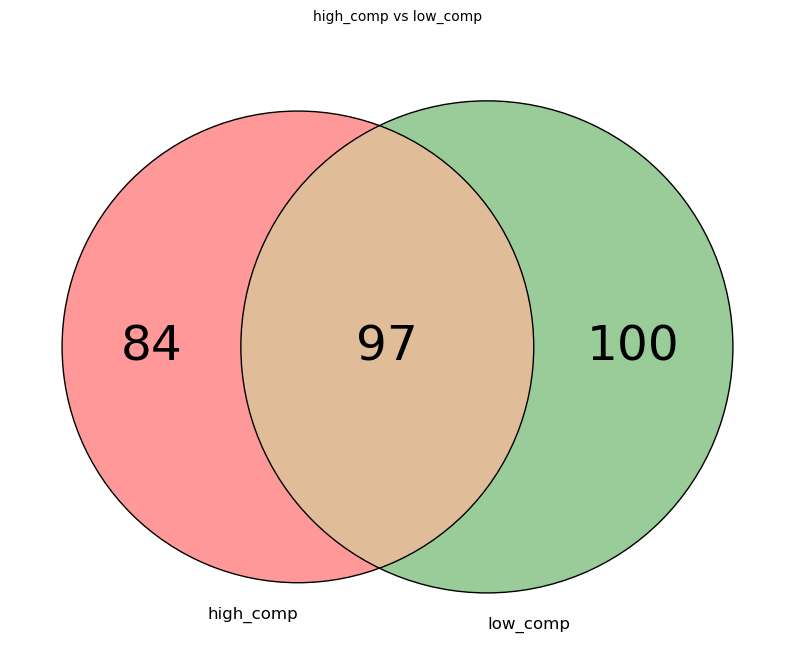

In [108]:
# Example 3: Look at only INCREASING units for competition events
print("\nEXAMPLE 3: High vs Low Competition - Increasing Units Only")
competition_events = ['high_comp', 'low_comp']
_ = create_venn_diagram(units_df, competition_events, significance_type='both');

Significant units for increase: [11, 143, 147, 23, 232, 33, 65, 12, 52, 68, 83, 14, 162, 210, 273, 479, 481, 10, 107, 174, 181, 205, 207, 28, 32, 34, 118, 6, 74, 80, 119, 13, 23, 34, 373, 90, 100, 102, 104, 108, 109, 23, 30, 53, 64, 59, 35, 48, 72, 103, 118, 19, 87, 134, 187, 263, 274, 207, 266, 7, 82, 84, 87, 130, 192, 164, 171, 90, 101, 113, 158, 248, 106, 98, 150, 190, 20, 109, 124, 146, 46, 60, 67, 110, 31, 59, 66, 93, 98, 101, 103, 15, 89, 14, 101, 13, 169, 177, 183, 216, 28, 24, 32, 4, 32, 12, 24, 42, 49, 54, 81]
Significant units for decrease: [199, 15, 46, 11, 38, 40, 6, 90, 93, 403, 70, 74, 300, 12, 144, 195, 22, 23, 26, 33, 53, 12, 12, 18, 235, 13, 151, 18, 9, 111, 116, 7, 17, 34, 39, 46, 49, 9, 99, 132, 262, 268, 89, 124, 45, 26, 36, 74, 181, 14, 170, 46, 33, 59, 154, 9, 111, 63, 3, 74, 32, 8, 58, 73, 12, 25, 62, 80, 81, 88, 3, 53]
All significant units: [11, 143, 147, 199, 23, 232, 33, 65, 12, 15, 46, 52, 68, 11, 38, 40, 6, 83, 90, 93, 14, 162, 210, 273, 403, 70, 74, 300, 4

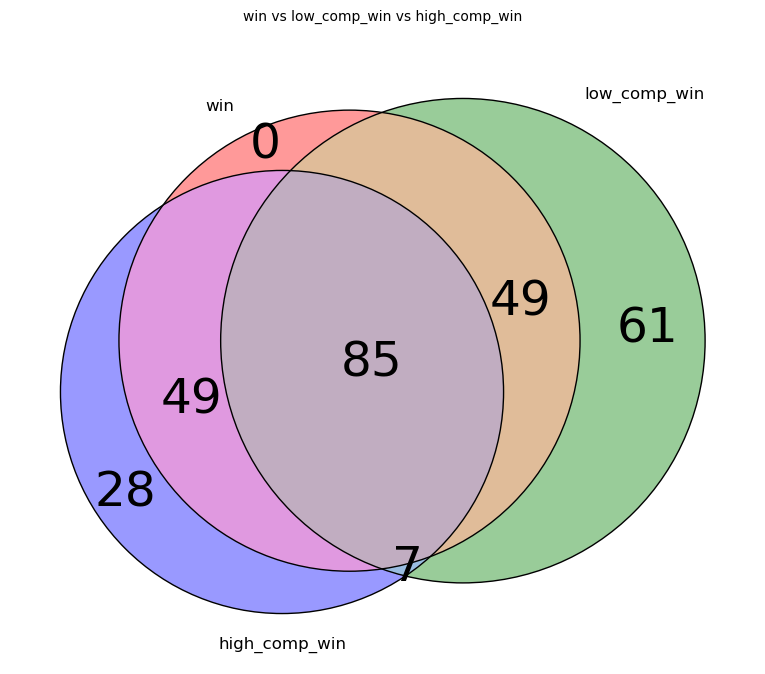

Significant units for increase: [104, 33, 51, 65, 12, 52, 61, 34, 40, 6, 83, 90, 1, 126, 14, 162, 176, 2, 210, 211, 240, 273, 283, 400, 403, 21, 223, 479, 481, 489, 513, 54, 60, 107, 174, 181, 20, 22, 34, 4, 0, 192, 229, 248, 295, 5, 6, 74, 80, 12, 13, 174, 175, 21, 23, 298, 331, 34, 369, 373, 376, 88, 120, 122, 133, 180, 43, 46, 104, 108, 109, 23, 30, 80, 28, 48, 54, 74, 139, 76, 90, 19, 187, 263, 272, 274, 275, 98, 82, 84, 87, 92, 0, 100, 101, 147, 42, 46, 64, 96, 109, 166, 173, 21, 234, 26, 274, 286, 302, 304, 307, 35, 54, 91, 22, 45, 6, 86, 9, 98, 78, 123, 13, 150, 20, 93, 109, 124, 136, 146, 46, 60, 101, 103, 72, 89, 14, 39, 40, 44, 49, 8, 101, 13, 158, 194, 216, 24, 25, 28, 53, 59, 32, 52, 68, 24, 25, 4, 81, 24, 3, 32, 4, 7, 24, 49, 54]
Significant units for decrease: [126, 143, 189, 199, 211, 232, 50, 58, 11, 38, 93, 36, 70, 300, 12, 144, 195, 23, 32, 33, 53, 12, 154, 18, 76, 9, 111, 7, 3, 132, 6, 145, 33, 79, 210, 13, 39, 50, 54, 66, 68, 73, 9, 33, 74, 32, 210, 23, 27, 58, 73, 

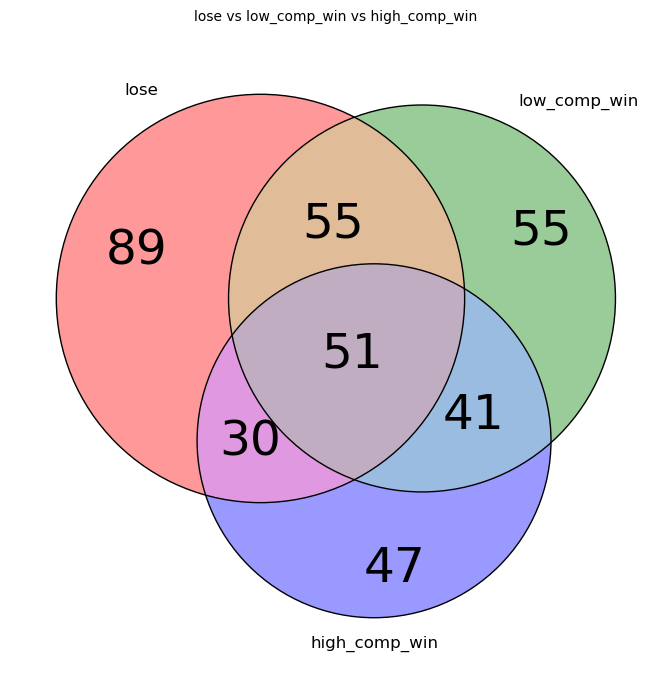

Significant units for increase: [11, 143, 147, 23, 232, 33, 65, 12, 52, 68, 83, 14, 162, 210, 273, 479, 481, 10, 107, 174, 181, 205, 207, 28, 32, 34, 118, 6, 74, 80, 119, 13, 23, 34, 373, 90, 100, 102, 104, 108, 109, 23, 30, 53, 64, 59, 35, 48, 72, 103, 118, 19, 87, 134, 187, 263, 274, 207, 266, 7, 82, 84, 87, 130, 192, 164, 171, 90, 101, 113, 158, 248, 106, 98, 150, 190, 20, 109, 124, 146, 46, 60, 67, 110, 31, 59, 66, 93, 98, 101, 103, 15, 89, 14, 101, 13, 169, 177, 183, 216, 28, 24, 32, 4, 32, 12, 24, 42, 49, 54, 81]
Significant units for decrease: [199, 15, 46, 11, 38, 40, 6, 90, 93, 403, 70, 74, 300, 12, 144, 195, 22, 23, 26, 33, 53, 12, 12, 18, 235, 13, 151, 18, 9, 111, 116, 7, 17, 34, 39, 46, 49, 9, 99, 132, 262, 268, 89, 124, 45, 26, 36, 74, 181, 14, 170, 46, 33, 59, 154, 9, 111, 63, 3, 74, 32, 8, 58, 73, 12, 25, 62, 80, 81, 88, 3, 53]
All significant units: [11, 143, 147, 199, 23, 232, 33, 65, 12, 15, 46, 52, 68, 11, 38, 40, 6, 83, 90, 93, 14, 162, 210, 273, 403, 70, 74, 300, 4

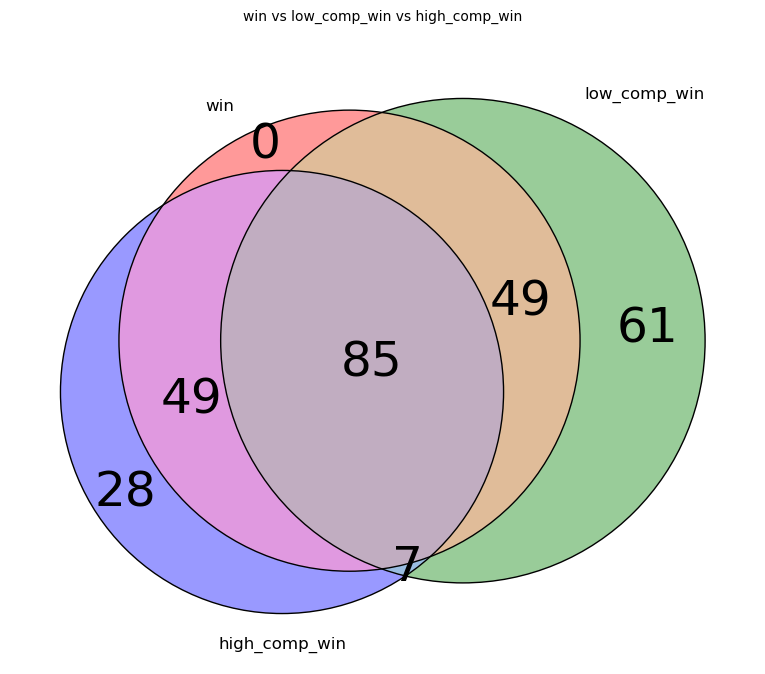

Significant units for increase: [11, 143, 147, 23, 232, 33, 65, 12, 52, 68, 83, 14, 162, 210, 273, 479, 481, 10, 107, 174, 181, 205, 207, 28, 32, 34, 118, 6, 74, 80, 119, 13, 23, 34, 373, 90, 100, 102, 104, 108, 109, 23, 30, 53, 64, 59, 35, 48, 72, 103, 118, 19, 87, 134, 187, 263, 274, 207, 266, 7, 82, 84, 87, 130, 192, 164, 171, 90, 101, 113, 158, 248, 106, 98, 150, 190, 20, 109, 124, 146, 46, 60, 67, 110, 31, 59, 66, 93, 98, 101, 103, 15, 89, 14, 101, 13, 169, 177, 183, 216, 28, 24, 32, 4, 32, 12, 24, 42, 49, 54, 81]
Significant units for decrease: [199, 15, 46, 11, 38, 40, 6, 90, 93, 403, 70, 74, 300, 12, 144, 195, 22, 23, 26, 33, 53, 12, 12, 18, 235, 13, 151, 18, 9, 111, 116, 7, 17, 34, 39, 46, 49, 9, 99, 132, 262, 268, 89, 124, 45, 26, 36, 74, 181, 14, 170, 46, 33, 59, 154, 9, 111, 63, 3, 74, 32, 8, 58, 73, 12, 25, 62, 80, 81, 88, 3, 53]
All significant units: [11, 143, 147, 199, 23, 232, 33, 65, 12, 15, 46, 52, 68, 11, 38, 40, 6, 83, 90, 93, 14, 162, 210, 273, 403, 70, 74, 300, 4

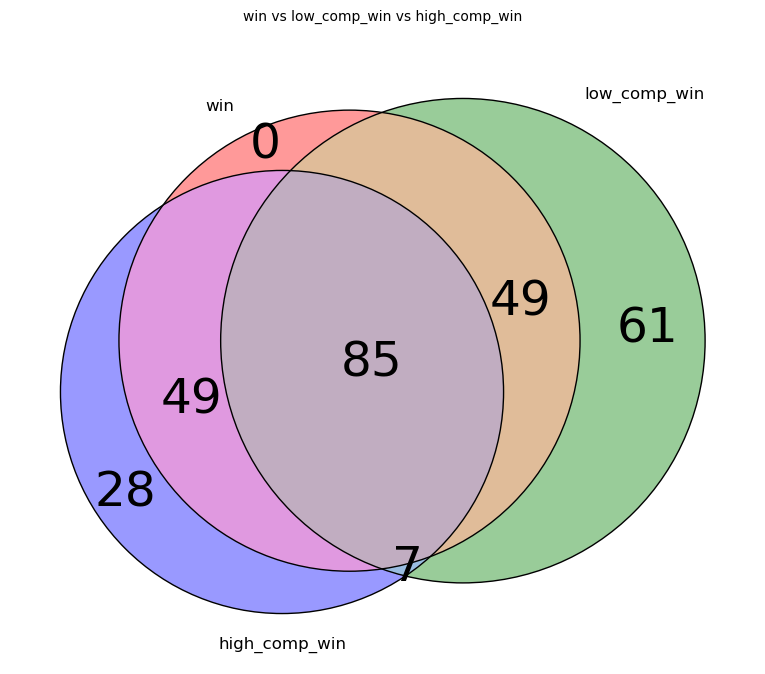

In [109]:
_ = create_venn_diagram(units_df, ['win', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");
_ = create_venn_diagram(units_df, ['lose', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");
_ = create_venn_diagram(units_df, ['win', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");
_ = create_venn_diagram(units_df, ['win', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");


In [110]:
from upsetplot import from_contents, UpSet
import matplotlib.pyplot as plt

def create_upset_plot(units_df, events, significance_type='both', title="UpSet Plot"):
    """
    Create an UpSet plot for given events using unique neuron identifiers.
    """
    # Build event_sets with your existing identifier logic
    event_sets = {}
    for event in events:
        event_df = units_df[units_df['Event name'] == event]

        if significance_type == 'both':
            filtered_df = event_df[event_df['sig'].isin(['increase', 'decrease'])]
        else:
            filtered_df = event_df[event_df['sig'] == significance_type]

        # Construct unique identifiers (same as your Venn function)
        identifiers = []
        for _, row in filtered_df.iterrows():
            rec = row['Recording']
            unit = row['Unit number']
            identifiers.append(f"{rec}_Unit{unit}")
        event_sets[event] = set(identifiers)

    # Convert dict to upset-compatible format
    data = from_contents(event_sets)

    # Plot - using sort_by='cardinality' for clearer increasing order
    up = UpSet(data, subset_size='count', show_counts=True, sort_by='cardinality')
    up.plot()
    plt.suptitle(title, fontsize=14)
    plt.show()

    # Print totals
    all_units = set().union(*event_sets.values())
    print(f"\nTotal unique units across all selected events: {len(all_units)}")
    for ev in events:
        print(f"{ev}: {len(event_sets[ev])} units")

    return event_sets

c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

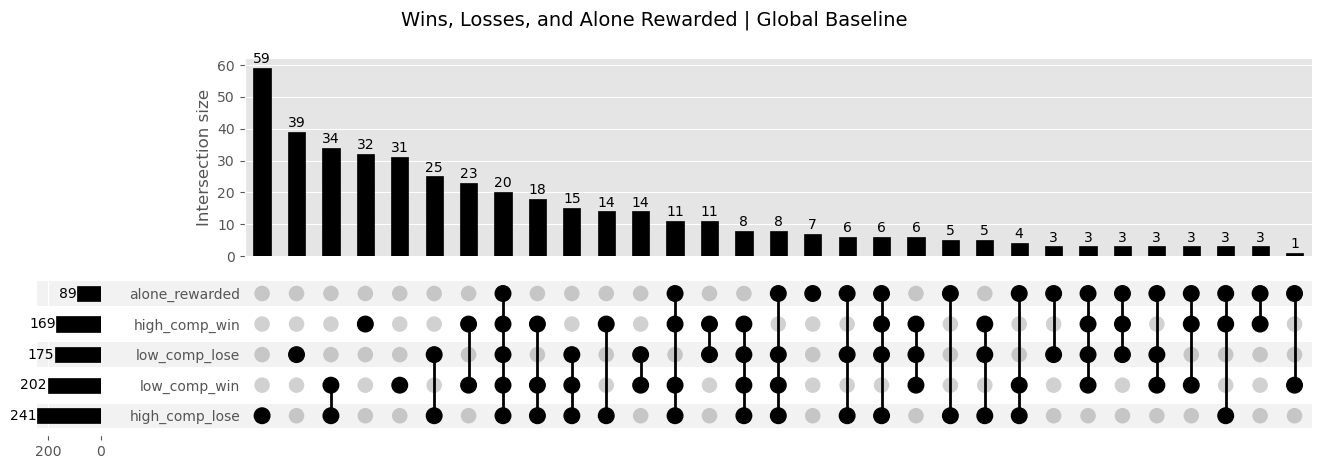


Total unique units across all selected events: 423
low_comp_lose: 175 units
high_comp_lose: 241 units
high_comp_win: 169 units
low_comp_win: 202 units
alone_rewarded: 89 units


c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

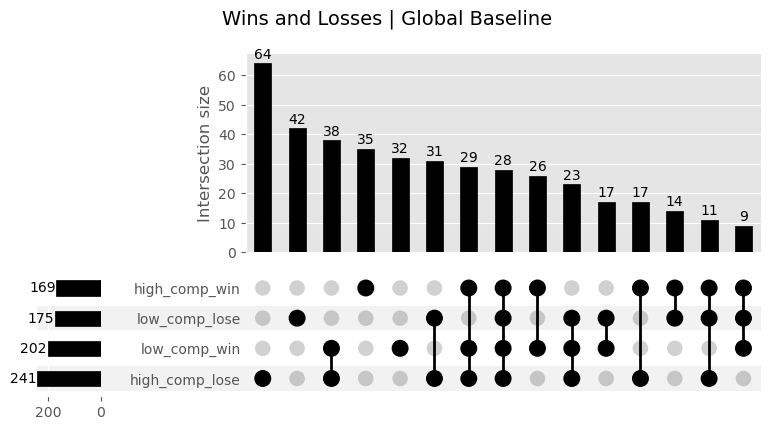


Total unique units across all selected events: 416
low_comp_win: 202 units
high_comp_win: 169 units
low_comp_lose: 175 units
high_comp_lose: 241 units


{'low_comp_win': {'20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit143',
  '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit147',
  '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit192',
  '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit199',
  '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit23',
  '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit232',
  '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit33',
  '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit65',
  '20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec_Unit12',
  '20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec_Unit15',
  '20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec_Unit46',
  '20230612

In [111]:
# alone_rewarded w/ all four small ones
create_upset_plot(units_df, ['low_comp_lose', 'high_comp_lose', 'high_comp_win', 'low_comp_win', 'alone_rewarded'], 
                  title="Wins, Losses, and Alone Rewarded | Global Baseline")

# just all four small ones 
create_upset_plot(units_df, ['low_comp_win', 'high_comp_win', 'low_comp_lose', 'high_comp_lose'], 
                  title="Wins and Losses | Global Baseline")


## Taking out sessions that don't have alone_rewarded so we have fair comparison

In [112]:
units_df.head()

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,1.894159,increase,40
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,2.079127,increase,40
12,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,211,-2.638851,decrease,40
15,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,232,4.595309,increase,40
16,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,33,-1.675371,decrease,40


In [113]:
# dataframe without alone_rewarded event
units_df_no_alone_rewarded_recs = pd.read_csv(r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\outputs\zscores_event_specific_standardway_some.csv")
units_df_no_alone_rewarded_recs.head(5)

,Recording,Event name,Unit number,Pre-event M,Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.075,0.098058,0.075,0.000000,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.250,0.263117,0.270,0.076012,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.060,0.103280,0.185,1.210307,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.745,0.441414,0.690,-0.124600,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,4.010,1.378182,3.215,-0.576847,not sig,40


c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

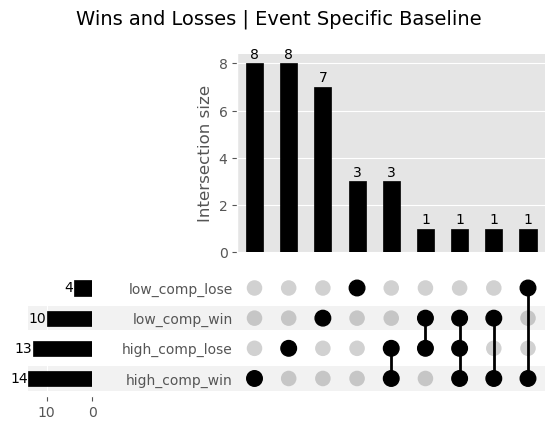

c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f


Total unique units across all selected events: 33
low_comp_win: 10 units
high_comp_win: 14 units
low_comp_lose: 4 units
high_comp_lose: 13 units


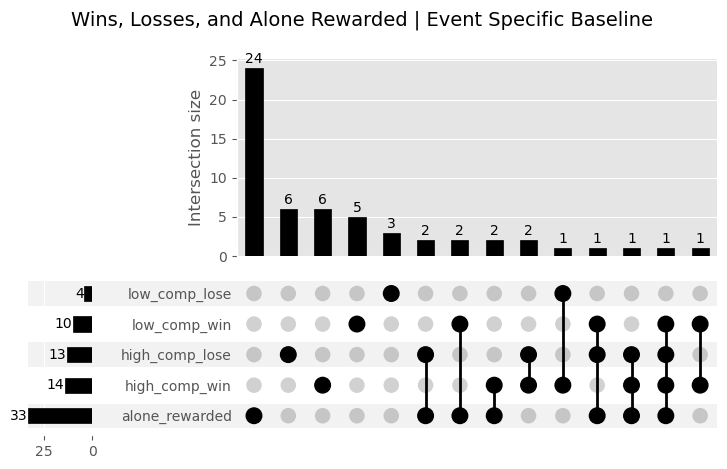


Total unique units across all selected events: 57
low_comp_lose: 4 units
high_comp_lose: 13 units
high_comp_win: 14 units
low_comp_win: 10 units
alone_rewarded: 33 units


{'low_comp_lose': {'20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged.rec_Unit21',
  '20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec_Unit3',
  '20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec_Unit4',
  '20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec_Unit7'},
 'high_comp_lose': {'20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec_Unit211',
  '20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec_Unit52',
  '20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec_Unit107',
  '20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec_Unit20',
  '20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec_Unit4',
  '20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec_Unit6',
  '20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec_Unit80',
  '20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_mer

In [114]:
# just all four small ones 
create_upset_plot(units_df_no_alone_rewarded_recs, ['low_comp_win', 'high_comp_win', 'low_comp_lose', 'high_comp_lose'], 
                  title="Wins and Losses | Event Specific Baseline")

# alone_rewarded w/ all four small ones
create_upset_plot(units_df_no_alone_rewarded_recs, ['low_comp_lose', 'high_comp_lose', 'high_comp_win', 'low_comp_win', 'alone_rewarded'], 
                  title="Wins, Losses, and Alone Rewarded | Event Specific Baseline")
